##  EDA Student Performance Indicator

1. Problem Statement 

- This project understand how the studnet's performance (test score) is affected by other variable such as gender , Ethnicity , parental level of education , lunch and test preparation  course .


2. Data collection
   -  Dataset  source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
   -  The data consists of 8 columns and 1000 rows

3. Dataset Information

   - Gender : sex of student --> (Male \ Female)
   - race/ ethnicity : ethnicity of students ---> (Group A, B,C,D,E)
   - parental level of education : parental final education  --> (Bachelore Degree , some college , master's degree , associate's degree , high school)
   - lunch : Having before test (standard or free / reduced)
   - test preparation course : computer  or  not complete before test
   - maths score
   - reading score
   - Writing score 


In [72]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 


In [73]:
## Any warnning to resolve it
import warnings 
warnings.filterwarnings('ignore')

In [74]:
## Read the dataset 
df=pd.read_csv("C:\\Users\\Saurav\\Downloads\\StudentsPerformance.csv")

In [75]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
df.shape

(1000, 8)

## Data Checks to performs 
- Check the missing value 
- Check dupliacte 
- Check data type 
- Check the number of unique value of each columns 
- Check statistics of data set 
- chack various catgories presnet in teh different categorical columns 


In [78]:
## check the missing the value 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## insights or Observation 
- There is no missing value

In [80]:
## ckeck the missing the value 
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [81]:
## check the Duplicate 
df.duplicated().sum()

0

## There is no duplicates  value in dataset

In [83]:
## check the  datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [84]:
## Check the number of uniquees  value of each columns 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [85]:
## Check the staistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight or Observation 
- From the above description of numerical data , all means are very close to each other - between 66 and 69
- All the standard deviation are also close between 14.6 - 15.19 
- While there is a minimum of 0 for maths , other are having 17 and 10 value 


In [87]:
## Explore more info about the data 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [88]:
## last five records 
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [89]:
[feature for feature in df.columns  if df[feature].dtype != "O"]

['math score', 'reading score', 'writing score']

In [90]:
## Segrregate numerical and categorical feature
numerical_features = [feature for feature in df.columns  if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns  if df[feature].dtype == "O"]

In [91]:
numerical_features

['math score', 'reading score', 'writing score']

In [92]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [93]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [94]:
## total 5 groups present in the "race/ethnicity"
df["race/ethnicity"].value_counts()


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [95]:
## Aggregate the total score with mean

df['total_score'] = df['math score']+ df["reading score"] + df["writing score"]
df["Average"] = df["total_score"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [96]:
## Exploring more visulation
fig , axis  = plt.subplots(1,2 , figsize = (5 , 7))
plt.subplot(121)
sns.histplot(data = df , x="Average" , bins = 30 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df , x= "Average" , bins = 30 , kde = 30  , hue  = 'gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

## insight 
- Female students tend to perform well than male student 


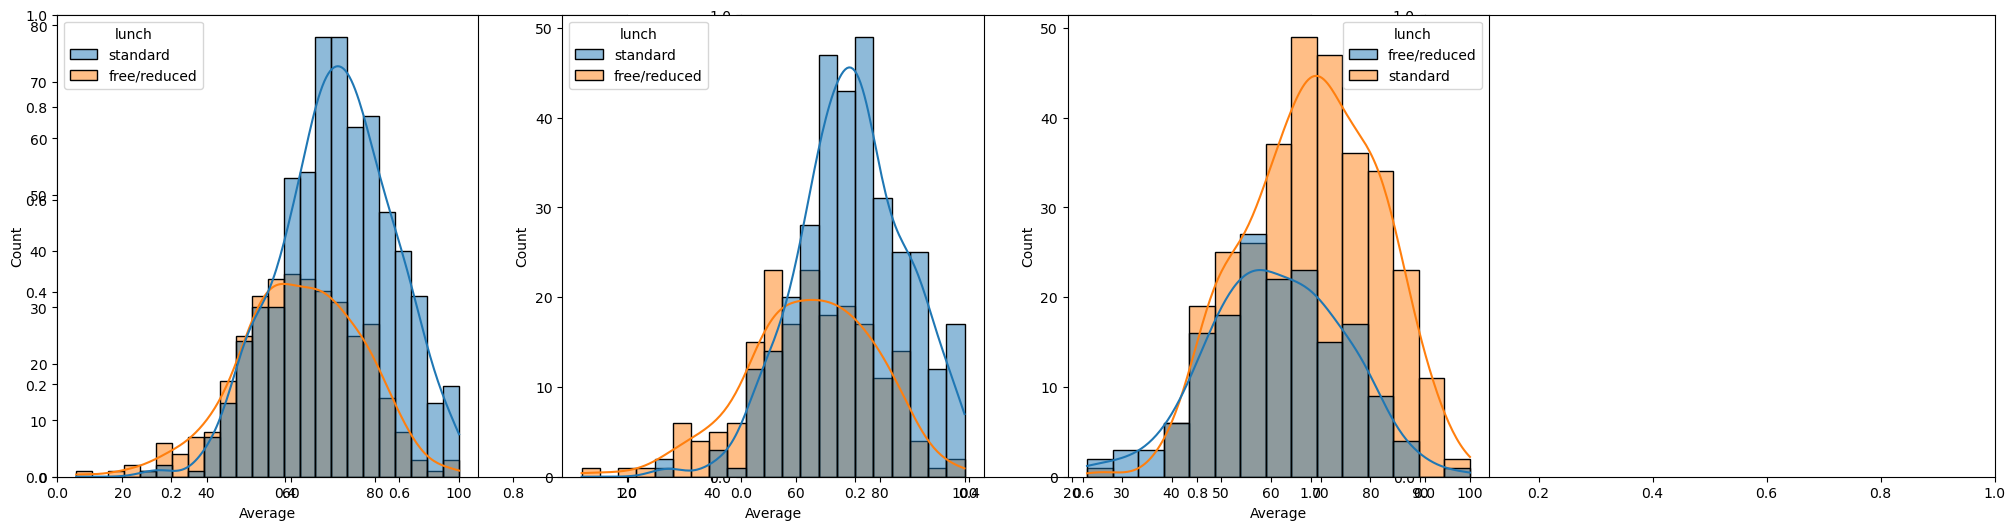

In [133]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.subplots(1,3,figsize = (25, 6))
plt.subplot(141)
sns.histplot(data= df , x= 'Average' , kde = True , hue = 'lunch')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x= 'Average' , kde = True , hue = 'lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x= 'Average' , kde = True , hue = 'lunch')

plt.show()

## Insight 
- Standard lunch help students well in exam 
- Standard lunch helps well in exams be it a male of female 

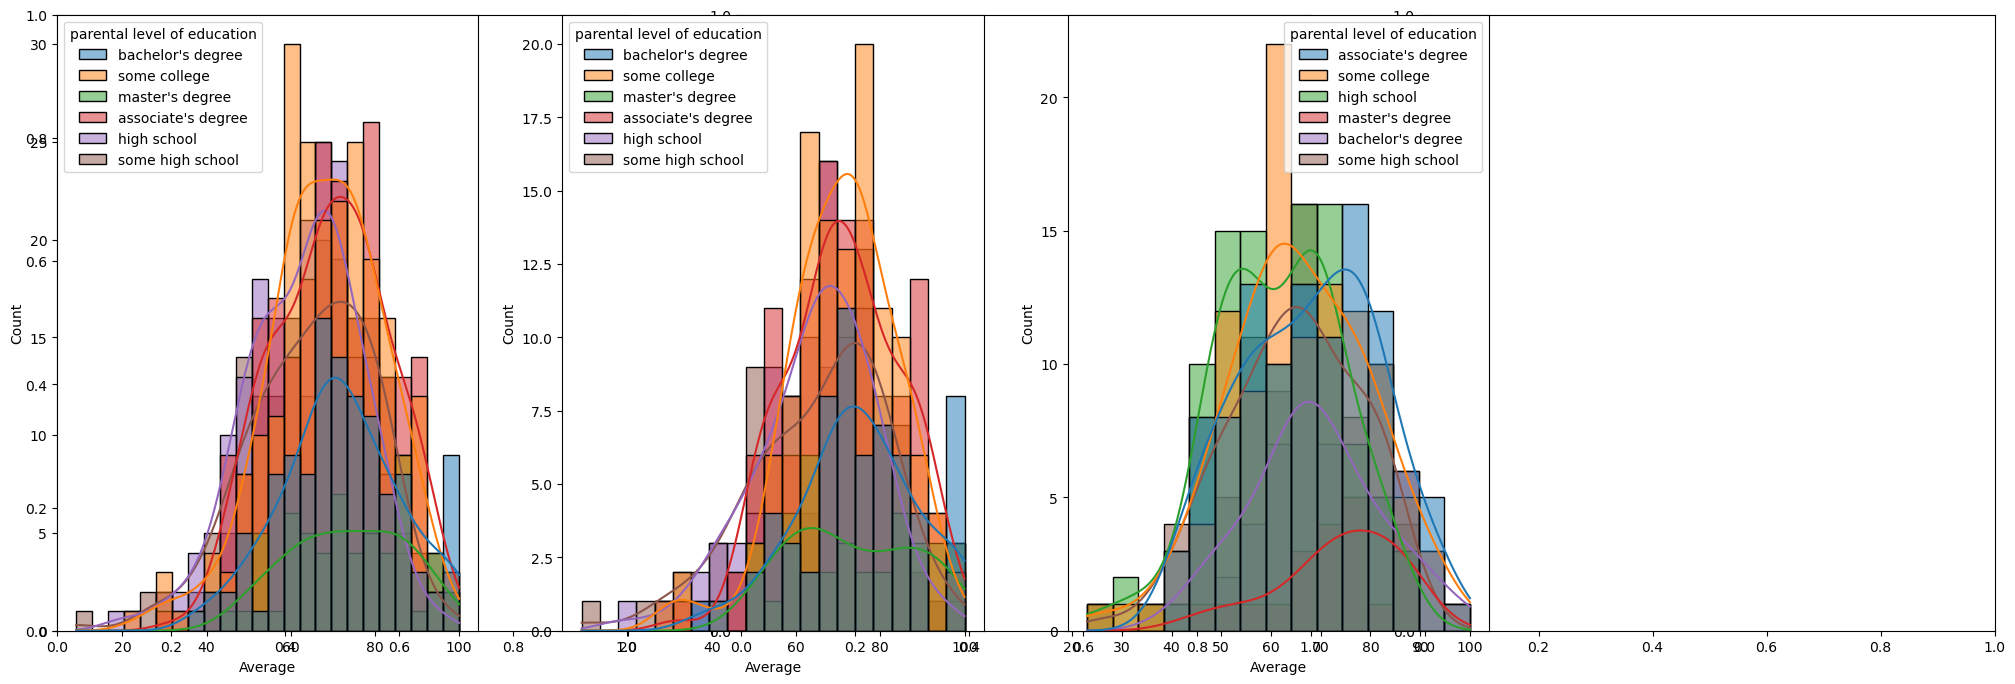

In [158]:
plt.subplots(1,3,figsize = (25,8))
plt.subplot(141)
sns.histplot(data= df , x= 'Average' , kde = True , hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x= 'Average' , kde = True , hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x= 'Average' , kde = True , hue = 'parental level of education')

plt.show()

## Insights
 - In general parent's education dont't help student perform well in exam.
 - 2rd plot we can see there is no effect of parent's education on female students
 - 3nd plot shows that parents whose education is of associate's degree or master's degree their male child tend to perform well
 

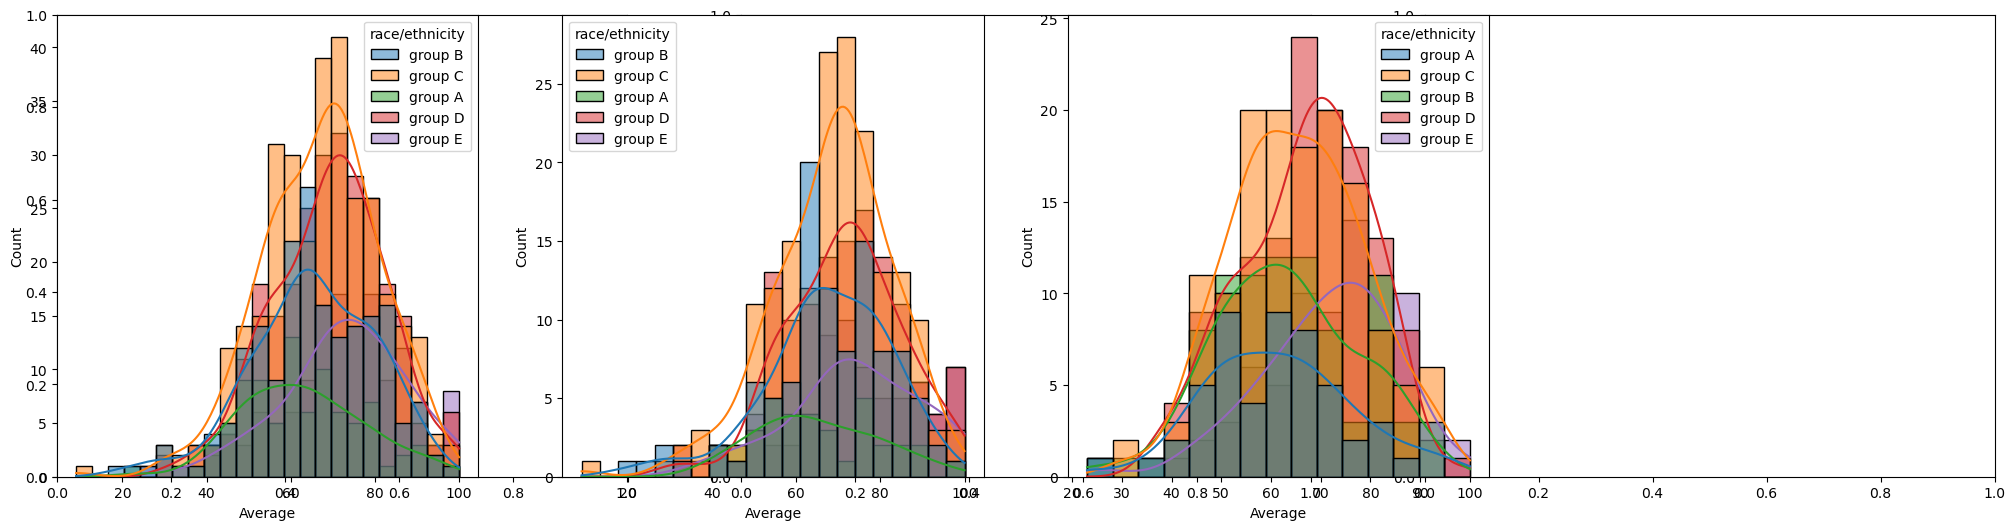

In [102]:
plt.subplots(1,3,figsize = (25, 6))
plt.subplot(141)
sns.histplot(data= df , x= 'Average' , kde = True , hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data= df[df.gender=='female'], x= 'Average' , kde = True , hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data= df[df.gender=='male'], x= 'Average' , kde = True , hue = 'race/ethnicity')

plt.show()

## Insights 
- Students of group A and group B tends to perform poorly in exam 
- Students of group A and group B tends to perform poorly in exam irrespective  of whether they are male or female.

In [104]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


sns.heatmap([numerical_features].corr() , annot = True)

# Education Policies and Forward-Looking Steps:

### Equal Opportunities in Education:

- Children's success is shaped not only by their academic skills but also by environmental factors (e.g., parental education, test preparation courses). Understanding the impact of these factors is critical to creating equal opportunities.

### Inclusive Education Programs:

- Education policies can provide programs customized to students' needs by taking such interactions into account. For example, different support programs or test preparation courses can be organized according to the level of parental education.

### Expanding Support Programs:

- Making opportunities such as test preparation courses more accessible to students with low-income and less educated parents can reduce achievement gaps.
